In [1]:
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import statsmodels.formula.api as smf                # Regression Modeling
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler


#Assigning Dataset to original_df as a DataFrame
file = "Apprentice_chef_Dataset.xlsx"
chef = pd.read_excel(file)

#Checking dataset
chef.head(5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,4,1,0,90,135.3,3,1,3,13,253


Here we are trying to analyze the further sucess of the company . How is the cross selling being accepted by their customers and how they can further go ahead with their stratergies. We are using the apprentice dataset for this purpose, which has information about the customers, their details, their purchase details , account details etc.

We will try to determine the cross sell success achieved by far by the company. Also what are the maximum and the minimum number of meals ordered by the customer here.

In [2]:
total = chef['CROSS_SELL_SUCCESS'].value_counts()

max_meals_ordered = chef.loc[ : , 'TOTAL_MEALS_ORDERED'][chef['CROSS_SELL_SUCCESS'] == 1].max()

min_meals_ordered = chef.loc[ : , 'TOTAL_MEALS_ORDERED'][chef['CROSS_SELL_SUCCESS'] == 1].min()


print(f""" 
Total cross sell success : 
{total}

Max meals ordered: {max_meals_ordered}
Min meals ordered: {min_meals_ordered} """)



 
Total cross sell success : 
1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64

Max meals ordered: 493
Min meals ordered: 11 


Lets plot the histograms of all the features we think are important to determine the cross selling success of the product. 

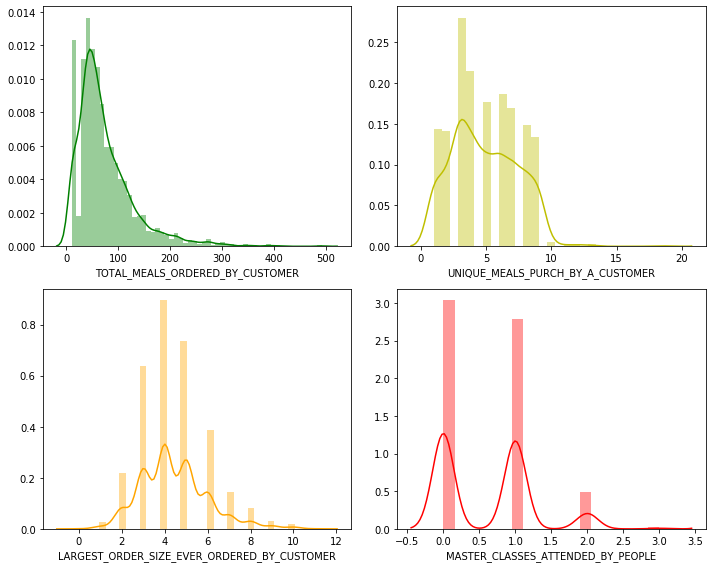

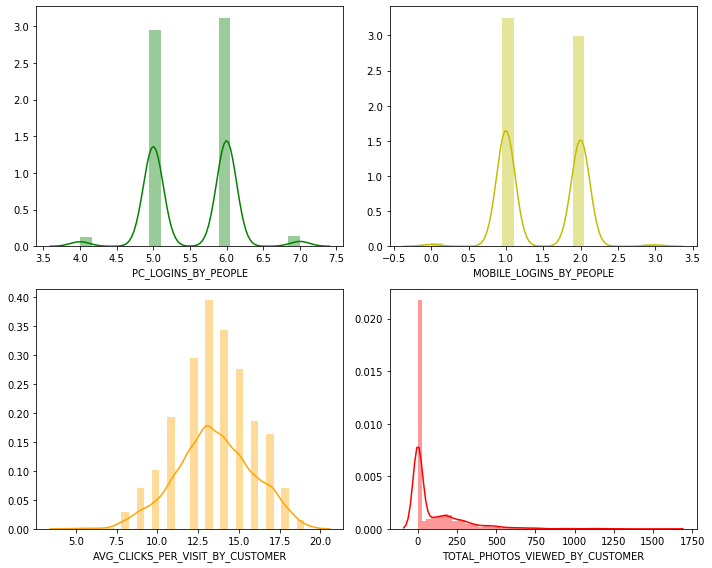

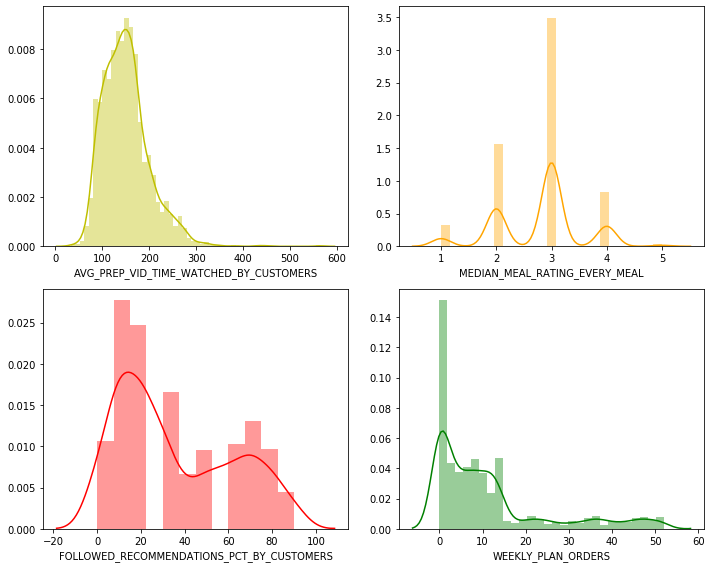

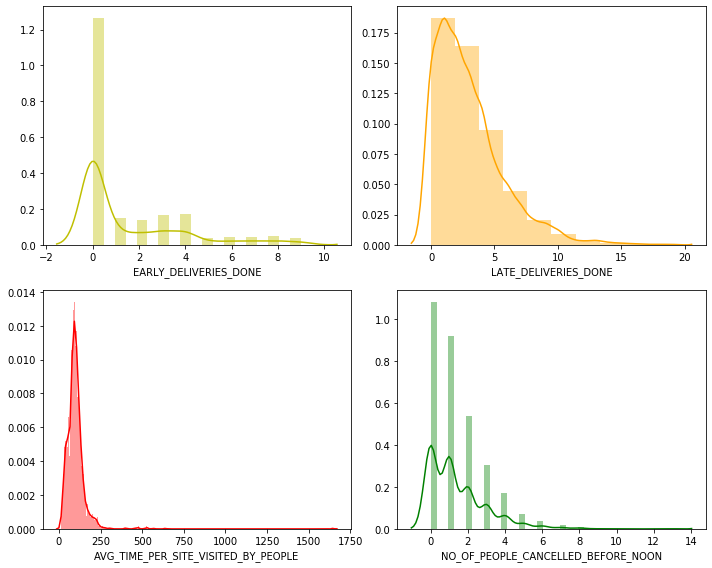

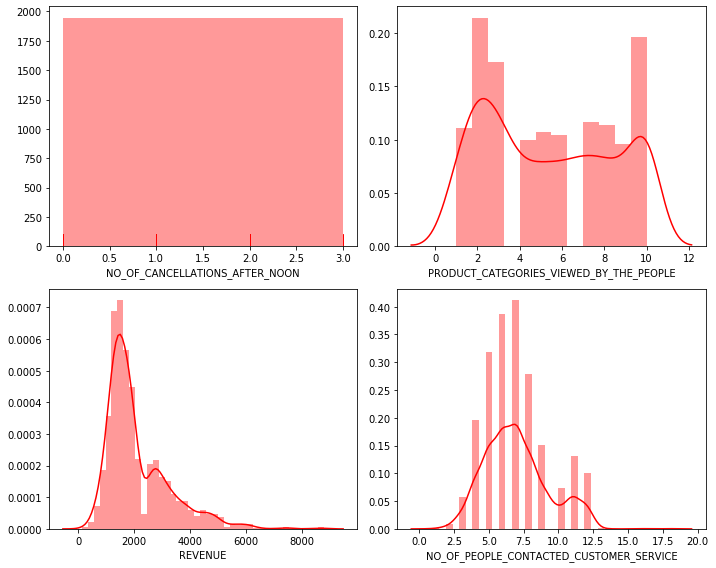

In [29]:
########################
# Histograms
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED_BY_CUSTOMER')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH_BY_A_CUSTOMER')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('LARGEST_ORDER_SIZE_EVER_ORDERED_BY_CUSTOMER')

########################
plt.subplot(2, 2, 4)
sns.distplot(chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED_BY_PEOPLE')
plt.tight_layout()
plt.savefig('Customer first.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['PC_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PC_LOGINS_BY_PEOPLE')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MOBILE_LOGINS_BY_PEOPLE')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT_BY_CUSTOMER')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED_BY_CUSTOMER')
plt.tight_layout()
plt.savefig('Customer Second.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_PREP_VID_TIME_WATCHED_BY_CUSTOMERS')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('MEDIAN_MEAL_RATING_EVERY_MEAL')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT_BY_CUSTOMERS')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('WEEKLY_PLAN_ORDERS')
plt.tight_layout()
plt.savefig('Customer third.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('EARLY_DELIVERIES_DONE')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['LATE_DELIVERIES'],
             bins = 10,
             color = 'orange')
plt.xlabel('LATE_DELIVERIES_DONE')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_TIME_PER_SITE_VISIT'],
             bins = 'fd',
             color = 'r')
plt.xlabel('AVG_TIME_PER_SITE_VISITED_BY_PEOPLE')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('NO_OF_PEOPLE_CANCELLED_BEFORE_NOON')
plt.tight_layout()
plt.savefig('Customer fourth.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('NO_OF_CANCELLATIONS_AFTER_NOON')
########################

plt.subplot(2, 2, 2)
sns.distplot(chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED_BY_THE_PEOPLE')


########################

plt.subplot(2, 2, 3)
sns.distplot(chef['REVENUE'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('REVENUE')

#########################
plt.subplot(2, 2, 4)
sns.distplot(chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins = 'fd',
             color = 'r')
plt.xlabel('NO_OF_PEOPLE_CONTACTED_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('Customer fifth.png')
plt.show()




Looking at the above graphs lets now go ahead and set outliers boundaries to proceed with feature engeering

In [30]:
#Setting Outliner Boundaries 

TOTAL_MEALS_ORDERED_HI         = 250
UNIQUE_MEALS_PURC_HI           = 10
AVG_TIME_SPENT_PER_VISIT_HI    = 250
CONTACTS_W_CUSTOMER_SERVICE_LO = 3
CONTACTS_W_CUSTOMER_SERVICE_HI = 12 
CANCELLATIONS_BEFORE_NOON_HI   = 9 
CANCELLATIONS_AFTER_NOON_HI    = 2 
MOBILE_LOGINS_HI               = 6.5
MOBILE_LOGINS_LO               = 4.5
WEEKLY_PLAN_HI                 = 50
EARLY_DELIVERIES_HI            = 7
LATE_DELIVERIES_HI             = 10
AVG_PREP_VID_TIME_HI           = 350
LARGEST_ORDER_SIZE_HI          = 10
MASTER_CLASSES_ATTENDED_HI     = 2
AVG_CLICKS_PER_VISIT_LO        = 7
AVG_CLICKS_PER_VISIT_HI        = 18
MEDIAN_MEAL_RATING_HI          = 4
TOTAL_PHOTOS_VIEWED_HI         = 800
REVENUE_HI                     = 5000

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# Total Meals Ordered
chef['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Unique Meals Purchased
chef['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = chef.loc[0:,'out_UNIQUE_MEALS_PURCH'][chef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURC_HI]

chef['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Average Time Per Site Visit
chef['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = chef.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_SPENT_PER_VISIT_HI]

chef['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Contact With Customer Service 
chef['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]
condition_lo = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chef['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_LO]

chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Cancellations Before Noon
chef['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = chef.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]

chef['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Cancellations After Noon
chef['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_HI]

chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Mobile Logins
chef['out_MOBILE_LOGINS'] = 0
condition_hi = chef.loc[0:,'out_MOBILE_LOGINS'][chef['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]
condition_lo = chef.loc[0:,'out_MOBILE_LOGINS'][chef['MOBILE_LOGINS'] < MOBILE_LOGINS_LO]

chef['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Weekly Plan
chef['out_WEEKLY_PLAN'] = 0
condition_hi = chef.loc[0:,'out_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

chef['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Early Deliveries 
chef['out_EARLY_DELIVERIES'] = 0
condition_hi = chef.loc[0:,'out_EARLY_DELIVERIES'][chef['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]

chef['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

chef['out_LATE_DELIVERIES'] = 0
condition_hi = chef.loc[0:,'out_LATE_DELIVERIES'][chef['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

chef['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Late Deliveries
chef['out_LATE_DELIVERIES'] = 0
condition_hi = chef.loc[0:,'out_LATE_DELIVERIES'][chef['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

chef['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Average Prep Video Time
chef['out_AVG_PREP_VID_TIME'] = 0
condition_hi = chef.loc[0:,'out_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]

chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Largest Order Size
chef['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = chef.loc[0:,'out_LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]

chef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# Master Classes Attended
chef['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = chef.loc[0:,'out_MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

chef['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Average Clicks Per Visit
chef['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = chef.loc[0:,'out_AVG_CLICKS_PER_VISIT'][chef['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI]
condition_lo = chef.loc[0:,'out_AVG_CLICKS_PER_VISIT'][chef['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_LO]

chef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)
chef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Median Meal Rating

chef['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = chef.loc[0:,'out_MEDIAN_MEAL_RATING'][chef['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_HI]

chef['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Total Photos Viewed
chef['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] > AVG_CLICKS_PER_VISIT_HI]

chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



Plotting the scatterplots after applying the feature engineering, to determine the high and low points

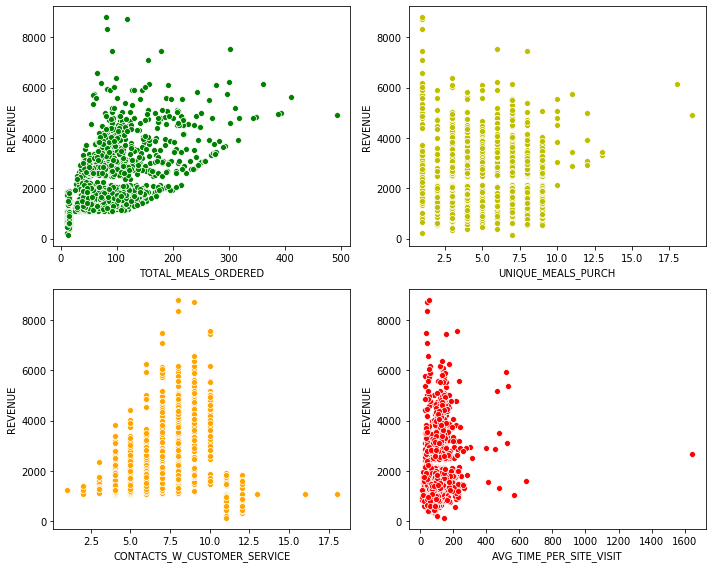

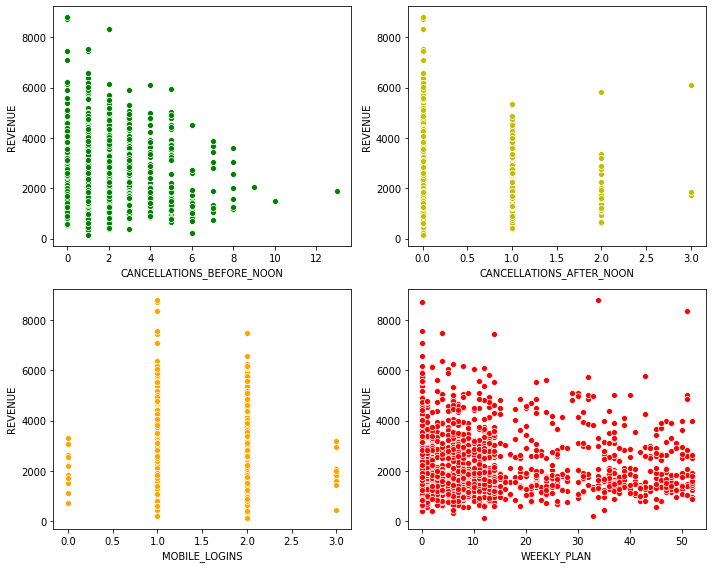

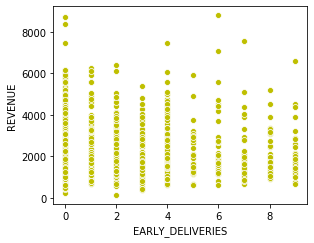

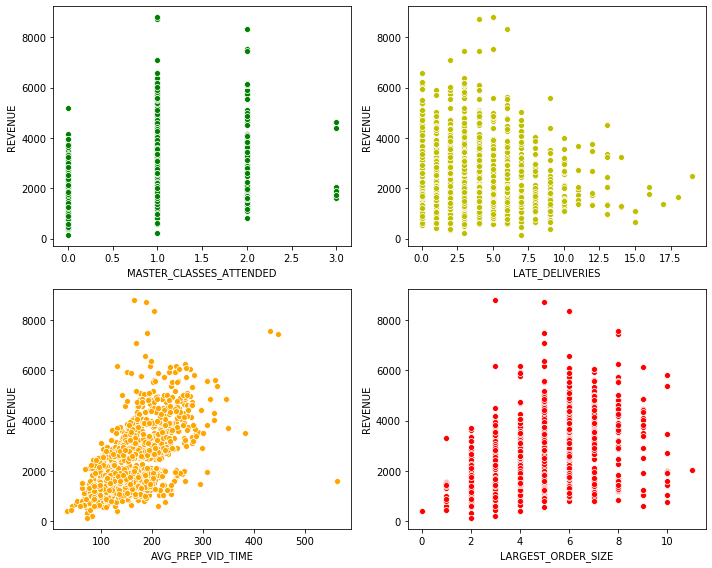

Text(0.5, 0, 'MEDIAN_MEAL_RATING')

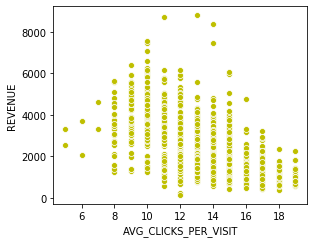

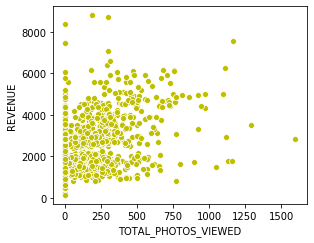

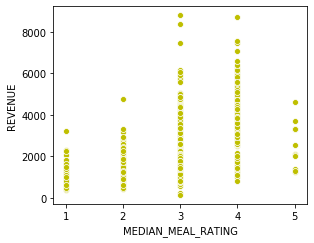

In [31]:
################
# SCATTERPLOTS
###############


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['TOTAL_MEALS_ORDERED'],
                color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['UNIQUE_MEALS_PURCH'],
                color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['CONTACTS_W_CUSTOMER_SERVICE'],
                color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['AVG_TIME_PER_SITE_VISIT'],
                color = 'r')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')
plt.tight_layout()
#plt.savefig('Housing Data Scatterplots 1 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['CANCELLATIONS_BEFORE_NOON'],
                color = 'g')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['CANCELLATIONS_AFTER_NOON'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['MOBILE_LOGINS'],
                color = 'orange')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['WEEKLY_PLAN'],
                color = 'r')
plt.xlabel('WEEKLY_PLAN')
plt.tight_layout()
#plt.savefig('Housing Data Scatterplots 2 of 5.png')
plt.show()

########################
########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['EARLY_DELIVERIES'],
                color = 'y')
plt.xlabel('EARLY_DELIVERIES')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 2)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['LATE_DELIVERIES'],
                color = 'y')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['AVG_PREP_VID_TIME'],
                color = 'orange')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['LARGEST_ORDER_SIZE'],
                color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 1)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['MASTER_CLASSES_ATTENDED'],
                color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')
plt.tight_layout()
#plt.savefig('Housing Data Scatterplots 3 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 2)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['AVG_CLICKS_PER_VISIT'],
                color = 'y')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 3)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['TOTAL_PHOTOS_VIEWED'],
                color = 'y')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 4)
sns.scatterplot(y = chef['REVENUE'],
                x = chef['MEDIAN_MEAL_RATING'],
                color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')





Setting thr thresholds based on the scatterplots generated for the valuable features

In [32]:
#Trend Based Threshold

CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI = 11
AVG_TIME_PER_SITE_VISIT_CHANGE_LO     = 120 
AVG_PREP_VID_TIME_CHANGE_HI           = 260
LARGEST_ORDER_SIZE_CHANGE_HI          = 6
AVG_CLICKS_PER_VISIT_CHANGE_HI        = 14
MASTER_CLASSES_ATTENDED_CHANGE_LO     = 3
TOTAL_MEALS_ORDERED_CHANGE_LO         = 25


CANCELLATIONS_BEFORE_NOON_CHANGE_AT   = 1
CANCELLATIONS_AFTER_NOON_CHANGE_AT    = 1
UNIQUE_MEALS_PURC_CHANGE_AT           = 1 
WEEKLY_PLAN_CHANGE_AT                 = 0
TOTAL_PHOTOS_VIEWED_CHANGE_AT         = 0
MEDIAN_MEAL_RATING_CHANGE_AT          = 3
MEDIAN_MEAL_RATING_CHANGE_AT_4        = 4
MEDIAN_MEAL_RATING_CHANGE_AT_5        = 5


# Contact With Customer Service 
chef['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = chef.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI]

chef['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# Average Time Spent Per Visit
chef['change_AVG_TIME_PER_SITE_VISIT'] = 0

condition = chef.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][chef['AVG_TIME_PER_SITE_VISIT'] < AVG_TIME_PER_SITE_VISIT_CHANGE_LO]

chef['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)
# Average Prep Vid
chef['change_AVG_PREP_VID_TIME'] = 0
condition = chef.loc[0:,'change_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI ]

chef['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
# Unique Meals Purchased
chef['change_LARGEST_ORDER_SIZE'] = 0
condition = chef.loc[0:,'change_LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_CHANGE_HI ]

chef['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Unique Meals Purchased
chef['change_AVG_CLICKS_PER_VISIT'] = 0
condition = chef.loc[0:,'change_AVG_CLICKS_PER_VISIT'][chef['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_CHANGE_HI ]

chef['change_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# Master Classes Attended
chef['change_MASTER_CLASSES_ATTENDED'] = 0
condition = chef.loc[0:,'change_MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] < MASTER_CLASSES_ATTENDED_CHANGE_LO ]

chef['change_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Master Classes Attended
chef['change_TOTAL_MEALS_ORDERED'] = 0
condition = chef.loc[0:,'change_TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_CHANGE_LO ]

chef['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

########################################
## change at threshold                ##
########################################

# double-equals sign

# Overall Cond
chef['change_UNIQUE_MEALS_PURCH'] = 0
condition = chef.loc[0:,'change_UNIQUE_MEALS_PURCH'][chef['UNIQUE_MEALS_PURCH'] == UNIQUE_MEALS_PURC_CHANGE_AT]

chef['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)


# Kitchen AbvGr 
chef['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = chef.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][chef['CANCELLATIONS_BEFORE_NOON'] == CANCELLATIONS_BEFORE_NOON_CHANGE_AT]

chef['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# Kitchen AbvGr 
chef['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = chef.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_CHANGE_AT]

chef['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# Mas Vnr Area
chef['change_WEEKLY_PLAN'] = 0
condition = chef.loc[0:,'change_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] == WEEKLY_PLAN_CHANGE_AT]

chef['change_WEEKLY_PLAN'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# Garage Area
chef['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = chef.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_CHANGE_AT]

chef['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

# Garage Area
chef['change_MEDIAN_MEAL_RATING'] = 0
condition = chef.loc[0:,'change_MEDIAN_MEAL_RATING'][chef['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_AT]

chef['change_MEDIAN_MEAL_RATING'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

chef['change_MEDIAN_MEAL_RATING_4'] = 0
condition = chef.loc[0:,'change_MEDIAN_MEAL_RATING_4'][chef['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_AT_4]

chef['change_MEDIAN_MEAL_RATING_4'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)
chef['change_MEDIAN_MEAL_RATING_5'] = 0
condition = chef.loc[0:,'change_MEDIAN_MEAL_RATING_5'][chef['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_AT_5]

chef['change_MEDIAN_MEAL_RATING_5'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)




Sorting the emails into their type folder list


In [34]:
# SORTING EMAIL DOMAINS INTO 3 LISTS: PERSONAL, JUNK, & WORK 
personal_email_domains = ['@gmail.com',
                          '@protonmail.com', 
                          '@yahoo.com'] 
                          
                          
junk_email_domains = ['@msn.com',
                          '@aol.com',
                          '@passport.com',
                          '@hotmail.com',          
                          '@live.com',
                          '@me.com']

work_email_domains = ['@student.hult.edu',
                      '@amex.com',
                      '@jnj.com',
                      '@mcdonalds.com',
                      '@merck.com',
                      '@cocacola.com',
                      '@nike.com',
                      '@apple.com',            
                      '@dupont.com',
                      '@ge.org',
                      '@ibm.com',
                      '@microsoft.com',
                      '@chevron.com',
                      '@travelers.com',
                      '@exxon.com',
                      '@unitedhealth.com',
                      '@boeing.com',
                      '@mmm.com',
                      '@caterpillar.com',
                      '@pg.com',
                      '@verizon.com',
                      '@walmart.com,disney.com',
                      '@pfizer.com', '@visa.com',
                      '@jpmorgan.com',
                      '@goldmansacs.com',
                      '@unitedtech.com',      
                      '@cisco.com',
                      '@homedepot.com',
                      '@intel.com',
                      '@student.hult.edu'
                     ]


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in email_chef[1] :
        if '@' + domain in personal_email_domains :
            placeholder_lst.append('personal')
            
        elif '@' + domain in junk_email_domains :
            placeholder_lst.append('junk')
                
        elif '@' + domain in work_email_domains :
            placeholder_lst.append('work')
            
       


# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef['domain_group'].value_counts()


personal    861
work        654
junk        389
Name: domain_group, dtype: int64

The statsmodel


In [36]:
# formatting each explanatory variable for statsmodels
chef_hist = chef.copy()

for val in chef_hist:
    print(f"chef{[val]} +")

chef['REVENUE'] +
chef['TOTAL_MEALS_ORDERED'] +
chef['UNIQUE_MEALS_PURCH'] +
chef['CONTACTS_W_CUSTOMER_SERVICE'] +
chef['PRODUCT_CATEGORIES_VIEWED'] +
chef['AVG_TIME_PER_SITE_VISIT'] +
chef['MOBILE_NUMBER'] +
chef['CANCELLATIONS_BEFORE_NOON'] +
chef['CANCELLATIONS_AFTER_NOON'] +
chef['TASTES_AND_PREFERENCES'] +
chef['PC_LOGINS'] +
chef['MOBILE_LOGINS'] +
chef['WEEKLY_PLAN'] +
chef['EARLY_DELIVERIES'] +
chef['LATE_DELIVERIES'] +
chef['PACKAGE_LOCKER'] +
chef['REFRIGERATED_LOCKER'] +
chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
chef['AVG_PREP_VID_TIME'] +
chef['LARGEST_ORDER_SIZE'] +
chef['MASTER_CLASSES_ATTENDED'] +
chef['MEDIAN_MEAL_RATING'] +
chef['AVG_CLICKS_PER_VISIT'] +
chef['TOTAL_PHOTOS_VIEWED'] +
chef['out_TOTAL_MEALS_ORDERED'] +
chef['out_UNIQUE_MEALS_PURCH'] +
chef['out_AVG_TIME_PER_SITE_VISIT'] +
chef['out_CONTACTS_W_CUSTOMER_SERVICE'] +
chef['out_CANCELLATIONS_BEFORE_NOON'] +
chef['out_CANCELLATIONS_AFTER_NOON'] +
chef['out_MOBILE_LOGINS'] +
chef['out_WEEKLY_PLAN'] +
chef['out_EAR

In [37]:
# declaring explanatory variables
chef_data = chef.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 222,
            stratify = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

#encountering an error here with cross sell success

KeyError: "['CROSS_SELL_SUCCESS'] not found in axis"

In [38]:
for val in chef:
    print(f"{val} +")

REVENUE +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
FOLLOWED_RECOMMENDATIONS_PCT +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
out_TOTAL_MEALS_ORDERED +
out_UNIQUE_MEALS_PURCH +
out_AVG_TIME_PER_SITE_VISIT +
out_CONTACTS_W_CUSTOMER_SERVICE +
out_CANCELLATIONS_BEFORE_NOON +
out_CANCELLATIONS_AFTER_NOON +
out_MOBILE_LOGINS +
out_WEEKLY_PLAN +
out_EARLY_DELIVERIES +
out_LATE_DELIVERIES +
out_AVG_PREP_VID_TIME +
out_LARGEST_ORDER_SIZE +
out_MASTER_CLASSES_ATTENDED +
out_AVG_CLICKS_PER_VISIT +
out_MEDIAN_MEAL_RATING +
out_TOTAL_PHOTOS_VIEWED +
change_CONTACTS_W_CUSTOMER_SERVICE +
change_AVG_TIME_PER_SITE_VISIT

In [39]:
# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

# declaring explanatory variables
chef = chef.drop('CROSS_SELL_SUCCESS', axis = 1)

# dropping string variables
chef = chef.drop(['NAME', 'FIRST_NAME', 'FAMILY_NAME'
                       ], axis = 1)

#encountering an error here with cross sell success

KeyError: 'CROSS_SELL_SUCCESS'

Logistic Regression

In [40]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef,
            chef_target,
            test_size = 0.25,
            random_state = 222,
            stratify = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~    
  MOBILE_NUMBER 
+ TASTES_AND_PREFERENCES 
+ PC_LOGINS 
+ FOLLOWED_RECOMMENDATIONS_PCT 
+ MASTER_CLASSES_ATTENDED 
+ change_CANCELLATIONS_BEFORE_NOON 
+ personal 
+ work 
  """,
                           data    = chef_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()




Optimization terminated successfully.
         Current function value: 0.445988
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                            8
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2898
Time:                        23:29:21   Log-Likelihood:                -650.70
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                1.566e-109
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.9837      0.689     -4.329      0.000      -4.335      -1.633
MOBILE_NUMBER                        0.6271      0.200      3.133      0.002       0.235       1.019
TASTES_AND_PREFERENCES               0.2939      0.149      1.973      0.049       0.002       0.586
PC_LOGINS                            0.0134      0.115      0.116      0.908      -0.212       0.239
FOLLOWED_RECOMMENDATIONS_PCT         0.0571      0.004     14.372      0.000       0.049       0.065
MASTER_CLASSES_ATTENDED              0.2480      0.107      2.326      0.020       0.039       0.457
change_CANCELLATIONS_BEFORE_NOON    -0.1199      0.149     -0.807      0.420      -0.411       0.171
personal                             1.3862      0.170      8.174      0.000       1.054       1.719
work                                 1.9089      0.189     10.083      0.000       1.538       2.280
====================================================================================================
"""

In [41]:
candidate_dict = {

'logit_full' : ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS',
       'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
       'out_TOTAL_MEALS_ORDERED', 'out_UNIQUE_MEALS_PURCH',
       'out_AVG_TIME_PER_SITE_VISIT', 'out_CONTACTS_W_CUSTOMER_SERVICE',
       'out_CANCELLATIONS_BEFORE_NOON', 'out_CANCELLATIONS_AFTER_NOON',
       'out_MOBILE_LOGINS', 'out_WEEKLY_PLAN', 'out_EARLY_DELIVERIES',
       'out_LATE_DELIVERIES', 'out_AVG_PREP_VID_TIME',
       'out_LARGEST_ORDER_SIZE', 'out_MASTER_CLASSES_ATTENDED',
       'out_AVG_CLICKS_PER_VISIT', 'out_MEDIAN_MEAL_RATING',
       'out_TOTAL_PHOTOS_VIEWED', 'junk', 'personal', 'work'],

'logit_sig' : ['MOBILE_NUMBER', 'TASTES_AND_PREFERENCES','PC_LOGINS',
       'FOLLOWED_RECOMMENDATIONS_PCT','MASTER_CLASSES_ATTENDED',
       'change_CANCELLATIONS_BEFORE_NOON','personal', 'work']
    
}

In [42]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig']]



# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

# area under the roc curve (auc)
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)

Training ACCURACY: 0.7567
Testing  ACCURACY: 0.729
[[ 84  72]
 [ 60 271]]


C:\Users\orlin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.678596328143156

In [43]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(4)


# test accuracy
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(4)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7567, 0.729, 0.6786]


Doing the KNN for classification

In [44]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(chef_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_data)


# converting scaled data into a DataFrame
chef_scaled = pd.DataFrame(X_scaled)


# checking the results
chef_scaled.describe().round(2)

# adding labels to the scaled DataFrame
chef_scaled.columns = chef_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(chef_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(chef_scaled)}
""")



Dataset BEFORE Scaling
----------------------
MOBILE_NUMBER                         0.107344
TASTES_AND_PREFERENCES                0.204082
PC_LOGINS                             0.337105
FOLLOWED_RECOMMENDATIONS_PCT        706.023186
MASTER_CLASSES_ATTENDED               0.411780
change_CANCELLATIONS_BEFORE_NOON      0.206472
personal                              0.246688
work                                  0.223128
dtype: float64


Dataset AFTER Scaling
----------------------
MOBILE_NUMBER                       1.0
TASTES_AND_PREFERENCES              1.0
PC_LOGINS                           1.0
FOLLOWED_RECOMMENDATIONS_PCT        1.0
MASTER_CLASSES_ATTENDED             1.0
change_CANCELLATIONS_BEFORE_NOON    1.0
personal                            1.0
work                                1.0
dtype: float64



C:\Users\orlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


In [45]:
# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            chef_scaled,
            chef_target,
            random_state = 222,
            test_size = 0.10,
            stratify = chef_target)



# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = 5)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('KNN AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4))

# creating a confusion matrix
print(confusion_matrix(y_true = y_test_scaled,
                       y_pred = knn_pred))

Training ACCURACY: 0.8178
Testing  ACCURACY: 0.7282
KNN AUC Score        : 0.6955
[[ 38  25]
 [ 28 104]]


In [46]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
knn_train_acc  = knn_fit.score(X_train_scaled, y_train_scaled).round(4)


# test accuracy
knn_test_acc   = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# auc value
knn_auc = roc_auc_score(y_true  = y_test_scaled,
                           y_score = knn_pred).round(4)


# saving the results
model_performance.append(['KNN',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['KNN', 0.8178, 0.7282, 0.6955]


In [ ]:
                                            The End